<a href="https://colab.research.google.com/github/akshatamadavi/cmpe258-assignment-3/blob/main/%5Bcolab_c%5Dnonlinear_regression_dnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-Layer Deep Neural Network for Nonlinear Regression
Using PyTorch `nn.Module`, autograd, and built-in optimizers.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## 1. Generate Nonlinear Data (sin wave + noise)

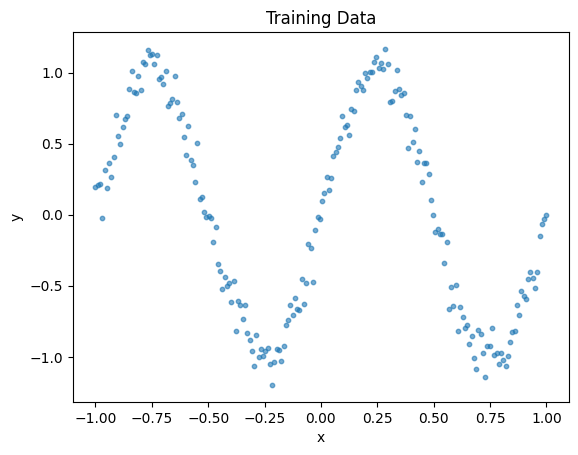

In [2]:
torch.manual_seed(42)

# y = sin(2πx) + noise
X = torch.linspace(-1, 1, 200).unsqueeze(1)   # shape (200, 1)
y = torch.sin(2 * torch.pi * X) + 0.1 * torch.randn_like(X)

plt.scatter(X.numpy(), y.numpy(), s=10, alpha=0.6)
plt.title('Training Data'); plt.xlabel('x'); plt.ylabel('y')
plt.show()

## 2. Define the Model

In [3]:
class RegressionNet(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, output_dim=1):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)   # 3rd layer → output
        )

    def forward(self, x):
        return self.net(x)

model = RegressionNet()
print(model)

RegressionNet(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
  )
)


## 3. Loss & Optimizer

In [4]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## 4. Training Loop (Backprop via autograd)

Epoch  200 | Loss: 0.020266
Epoch  400 | Loss: 0.008556
Epoch  600 | Loss: 0.008241
Epoch  800 | Loss: 0.007954
Epoch 1000 | Loss: 0.007825
Epoch 1200 | Loss: 0.007797
Epoch 1400 | Loss: 0.007771
Epoch 1600 | Loss: 0.007734
Epoch 1800 | Loss: 0.007730
Epoch 2000 | Loss: 0.007687


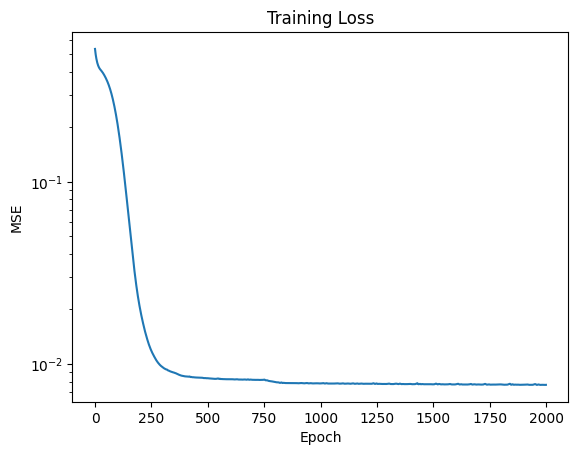

In [5]:
epochs = 2000
losses = []

for epoch in range(epochs):
    model.train()

    y_pred = model(X)            # forward pass
    loss = criterion(y_pred, y)  # compute loss

    optimizer.zero_grad()        # clear old gradients
    loss.backward()              # backprop (autograd)
    optimizer.step()             # update weights

    losses.append(loss.item())
    if (epoch + 1) % 200 == 0:
        print(f'Epoch {epoch+1:4d} | Loss: {loss.item():.6f}')

plt.plot(losses)
plt.title('Training Loss'); plt.xlabel('Epoch'); plt.ylabel('MSE')
plt.yscale('log'); plt.show()

## 5. Evaluate & Plot Predictions

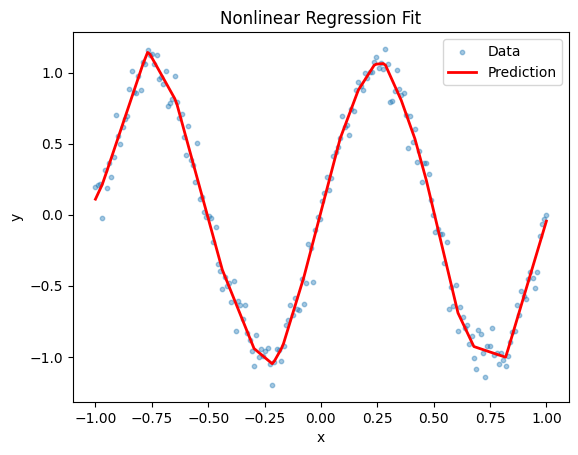

In [6]:
model.eval()
with torch.no_grad():
    y_pred = model(X)

plt.scatter(X.numpy(), y.numpy(), s=10, alpha=0.4, label='Data')
plt.plot(X.numpy(), y_pred.numpy(), color='red', linewidth=2, label='Prediction')
plt.title('Nonlinear Regression Fit'); plt.xlabel('x'); plt.ylabel('y')
plt.legend(); plt.show()